Plotting Player Ability To Read Passes
======================================

Data written to the passread*.csv file is generated from analyzing the motion events, rating each players' ability to anticipate a pass play. The model looks for individual motion events, and determines that if a player has moved away from the line of scrimmage on their most significant (longest) motion event, then they are anticipating a pass.

This notebook uses two dimensional scatter plots to uncover patterns in the underlying pass read data.

In [1]:
%reload_ext autoreload
%autoreload

import matplotlib.pyplot as plt
import pandas as pd
import analyze_play as ap

passread_filename = f"../{ap.PROCESSED_DATA_DIR}/passread.week4.20250103.121752.csv"

# open processed motions event data, confirm that shape looks correct
df_pr = pd.read_csv(passread_filename)

df_pr = df_pr.head(350)
print(df_pr.shape)

(350, 14)


In [2]:
columns = ["rec", "pre"]

# create lists for the true positive rate and false positive rate
x_col = df_pr[columns[0]].values
y_col = df_pr[columns[1]].values

In [3]:
print(df_pr["position"].unique())
levels, categories = pd.factorize(df_pr['position'])

['FS' 'SS' 'CB' 'ILB' 'MLB' 'OLB' 'DE' 'DT' 'NT' 'DB']


In [4]:
highlight_players = [ "Quandre Diggs",
                      "Budda Baker",
                      "Jessie Bates",
                      "Talanoa Hufanga",
                      "Eddie Jackson",
                      "Casey Hayward",
                      "James Bradberry",
                      "Patrick Surtain"
                    ]

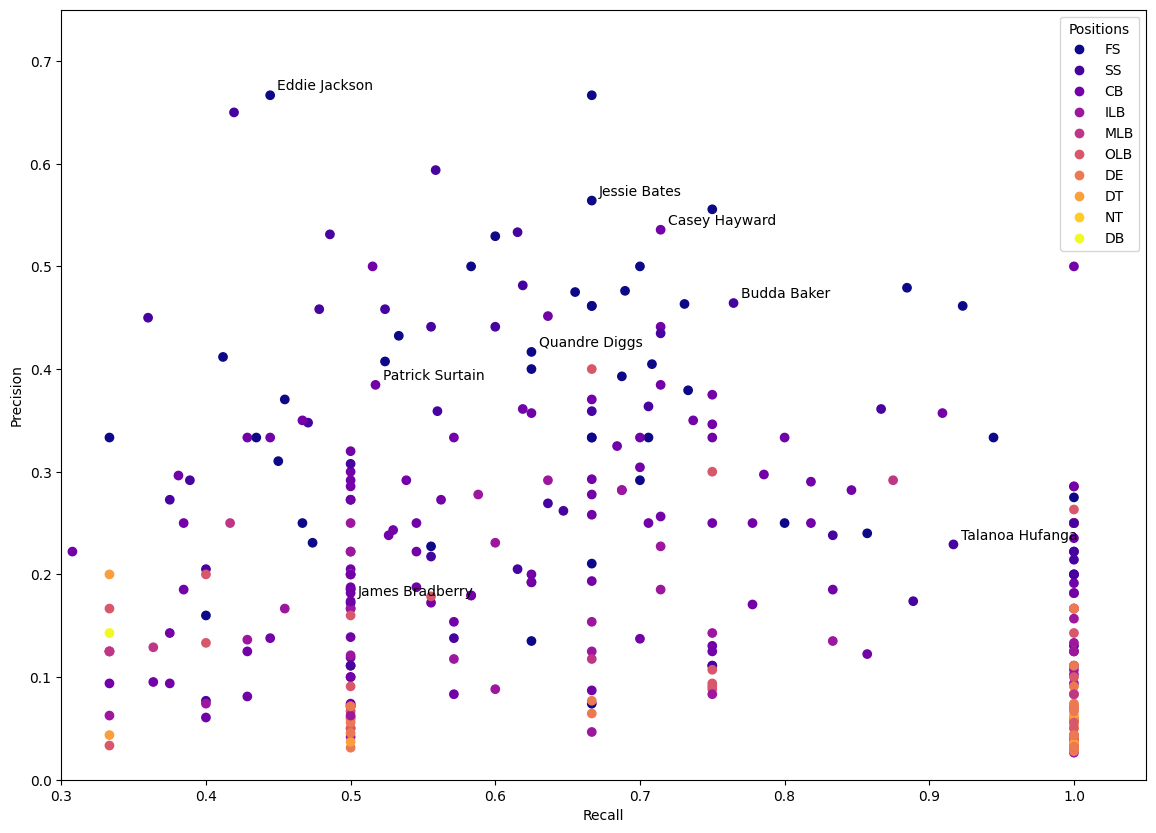

In [5]:
fig, ax = plt.subplots(figsize=(14,10))
scatter = ax.scatter(x_col, y_col, c=levels, cmap='plasma')

for p in highlight_players:
    player_row = df_pr[ df_pr[ "displayName" ] == p ]

    name  = player_row[ "displayName" ].values[0]
    x_val = player_row[ columns[0] ].values[0]
    y_val = player_row[ columns[1] ].values[0]

    ax.annotate( name, (x_val + 0.005, y_val + 0.005) )

ax.legend(scatter.legend_elements()[0], categories, title='Positions')

ax.set_xlim(0.3, 1.05)
ax.set_ylim(0.0, 0.75)

ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

plt.show()

#print(df_pr.head(20))